# Support Vector Machine



---

In this notebook, we use support vector machines to find the best hyperplane that separates the classes.

## Packages

In [85]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from matplotlib import pyplot as plt

## Data

In [82]:
data = pd.read_csv("elemek.txt", sep="\t", header=None)
data.shape
data.head()

,0,1,2
0,5.495510,4.239091,1
1,3.462259,5.436985,1
2,5.165979,4.352896,1
3,-2.159392,14.900500,1
4,1.635269,8.116939,1


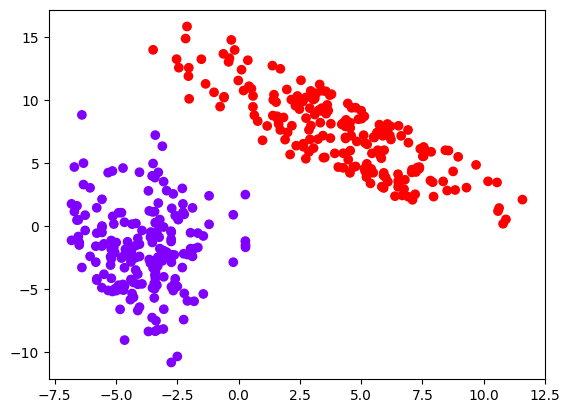

In [11]:
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data.iloc[:,2], cmap="rainbow")
plt.show()

- It is clear that the data is linearly separable.

## Linear SVM

- Let's fit a linear support vector machine model to the data:

In [83]:
clf = SVC(kernel="linear")

X = data.iloc[:,:2]
y = data.iloc[:,2]
clf.fit(X, y)
clf.support_vectors_

array([[-3.396495,  7.229055],
       [ 0.980157,  6.813771],
       [-2.014983, 10.11059 ]])

## Plot the decision boundary

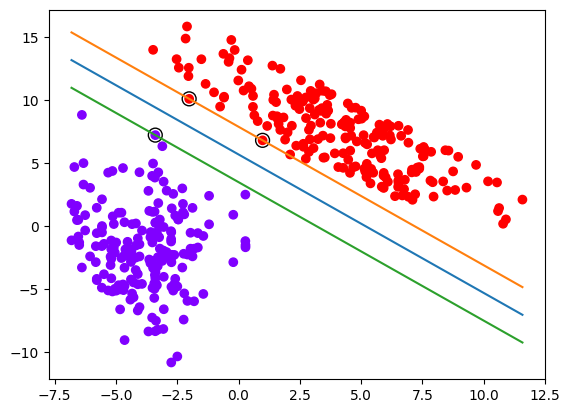

In [89]:
# plot the decision boundary
c0 = clf.intercept_[0]
c1, c2 = clf.coef_[0][0], clf.coef_[0][1]

get_x2 = lambda x1: -(c0+c1*x1)/c2

x_min, x_max = data.iloc[:,0].min(), data.iloc[:,0].max()
x1 = np.linspace(x_min, x_max, 100)
plt.plot(x1,get_x2(x1))

# plot the supporting vectors
sv = clf.support_vectors_
plt.scatter(sv[:,0], sv[:,1], s=100, facecolors='none', edgecolors="black")
plt.scatter(data.iloc[:,0], data.iloc[:,1], c=data.iloc[:,2], cmap="rainbow")

# plot the lines that passes through the supporting vectors
d1=1/np.linalg.norm(clf.coef_);
d2=d1/np.sin(np.pi/2+np.arctan(-clf.coef_[0][0]/clf.coef_[0][1])) # the margin

f = lambda x: -c1/c2 * x - c0/c2
plt.plot(x1, get_x2(x1)+d2)
plt.plot(x1, get_x2(x1)-d2)

plt.show()